<h2><a href="https://leetcode.com/problems/number-of-islands">200. Number of Islands</a></h2><h3>Medium</h3><hr><p>Given an <code>m x n</code> 2D binary grid <code>grid</code> which represents a map of <code>&#39;1&#39;</code>s (land) and <code>&#39;0&#39;</code>s (water), return <em>the number of islands</em>.</p>

<p>An <strong>island</strong> is surrounded by water and is formed by connecting adjacent lands horizontally or vertically. You may assume all four edges of the grid are all surrounded by water.</p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>

<pre>
<strong>Input:</strong> grid = [
  [&quot;1&quot;,&quot;1&quot;,&quot;1&quot;,&quot;1&quot;,&quot;0&quot;],
  [&quot;1&quot;,&quot;1&quot;,&quot;0&quot;,&quot;1&quot;,&quot;0&quot;],
  [&quot;1&quot;,&quot;1&quot;,&quot;0&quot;,&quot;0&quot;,&quot;0&quot;],
  [&quot;0&quot;,&quot;0&quot;,&quot;0&quot;,&quot;0&quot;,&quot;0&quot;]
]
<strong>Output:</strong> 1
</pre>

<p><strong class="example">Example 2:</strong></p>

<pre>
<strong>Input:</strong> grid = [
  [&quot;1&quot;,&quot;1&quot;,&quot;0&quot;,&quot;0&quot;,&quot;0&quot;],
  [&quot;1&quot;,&quot;1&quot;,&quot;0&quot;,&quot;0&quot;,&quot;0&quot;],
  [&quot;0&quot;,&quot;0&quot;,&quot;1&quot;,&quot;0&quot;,&quot;0&quot;],
  [&quot;0&quot;,&quot;0&quot;,&quot;0&quot;,&quot;1&quot;,&quot;1&quot;]
]
<strong>Output:</strong> 3
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>m == grid.length</code></li>
	<li><code>n == grid[i].length</code></li>
	<li><code>1 &lt;= m, n &lt;= 300</code></li>
	<li><code>grid[i][j]</code> is <code>&#39;0&#39;</code> or <code>&#39;1&#39;</code>.</li>
</ul>


## DFS
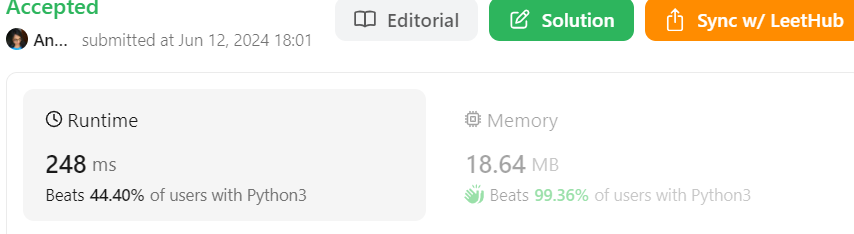

In [1]:
from collections import deque
from typing import List
class Solution:
    def numIslands(self, grid: List[List[str]]) -> int:
        rows, cols = len(grid), len(grid[0])
        islands = 0
        vis = [[0 for _ in range(cols)] for _ in range(rows)]
        directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]

        def dfs(x, y, grid, vis):
            vis[x][y] = 1
            for dx, dy in directions:
                if 0 <= x+dx < len(grid) and 0 <= y + dy < len(grid[0]) and vis[x+dx][y+dy] == 0 and grid[x+dx][y+dy]=='1':
                    dfs(x+dx, y+dy, grid, vis)

        for i in range(rows):
            for j in range(cols):
                if grid[i][j] == '1' and vis[i][j] == 0:
                    islands += 1
                    dfs(i, j, grid, vis)

        return islands

## BFS

In [2]:
from collections import deque
class Solution:
    def numIslands(self, grid: List[List[str]]) -> int:
        if not grid:
            return 0

        directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]
        islands = 0

        def bfs(grid, i, j):
            queue = deque([(i, j)])

            while queue:
                (x, y) = queue.popleft()
                
                if 0 <= x < len(grid) and 0 <=  y < len(grid[0]) and grid[x][y] == "1":
                    grid[x][y] = "0"
                    for dx, dy in directions:
                        queue.append((x + dx, y + dy))

        
        for i in range(len(grid)):
            for j in range(len(grid[0])):
                if grid[i][j] == "1":
                    islands  += 1
                    bfs(grid, i, j)

        return islands